# Introduction to the data set

### Column Information :
1. **symboling**: -3, -2, -1, 0, 1, 2, 3. 
2. **normalized-losses**: continuous from 65 to 256. 
3. **make**: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. **fuel-type**: diesel, gas. 
5. **aspiration**: std, turbo. 
6. **num-of-doors**: four, two. 
7. **body-style**: hardtop, wagon, sedan, hatchback, convertible. 
8. **drive-wheels**: 4wd, fwd, rwd. 
9. **engine-location**: front, rear. 
10. **wheel-base**: continuous from 86.6 120.9. 
11. **length**: continuous from 141.1 to 208.1. 
12. **width**: continuous from 60.3 to 72.3. 
13. **height**: continuous from 47.8 to 59.8. 
14. **curb-weight**: continuous from 1488 to 4066. 
15. **engine-type**: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. **num-of-cylinders**: eight, five, four, six, three, twelve, two. 
17. **engine-size**: continuous from 61 to 326. 
18. **fuel-system**: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. **bore**: continuous from 2.54 to 3.94. 
20. **stroke**: continuous from 2.07 to 4.17. 
21. **compression-ratio**: continuous from 7 to 23. 
22. **horsepower**: continuous from 48 to 288. 
23. **peak-rpm**: continuous from 4150 to 6600. 
24. **city-mpg**: continuous from 13 to 49. 
25. **highway-mpg**: continuous from 16 to 54. 
26. **price**: continuous from 5118 to 45400.

Additional information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [1]:
# import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 99

In [2]:
# columns to be used
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
        'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length',
        'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 
        'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Read the data
cars = pd.read_csv('imports-85.data', header=None)

# Assign columns
cars.columns = cols

In [3]:
print(cars.info())
cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning

In [4]:
# Select only continuous numeric values.
continuous_numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
                'bore', 'stroke', 'compression-rate', 'horsepower', 
                'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_numeric_cols].copy()

# replace all '?' with np.nan
numeric_cars.replace('?', np.nan, inplace=True)

# Convert all columns to float.
numeric_cars = numeric_cars.astype('float')

# check the data type and null values in each column.
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [5]:
# Since we want to predict the price, remove all rows with the null values in price column.
numeric_cars = numeric_cars.dropna(subset=['price'])

# check null values.
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [6]:
# Replace other mean values with the column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

# check null values
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
# Normalize values. Use min-max normalization so that values range from 0-1.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [8]:
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.08125,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.11250,0.247664,0.673469,0.277778,0.342105,16430.0


In [9]:
numeric_cars.shape

(201, 14)

# Univariate model with a single k value.


In [10]:
# Import libraries.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# This function will return rmse vale for each feature.
def knn_train_test(train_col, target_col, df):
    
    # Create object.
    knn = KNeighborsRegressor()
    
    # random seed.
    np.random.seed(1)
    
    # permute indexes.
    shuffled_index = np.random.permutation(df.index)
    
    # Create new dataframe.
    rand_df = df.reindex(shuffled_index)
    
    # Create training and testing data.
    half_num_rows = int(len(rand_df)/2)
    train_df = rand_df.iloc[:half_num_rows]
    test_df = rand_df.iloc[half_num_rows:]
    
    # Fit the model.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions.
    predictions = knn.predict(test_df[[train_col]])
    
    # Calculate rmse.
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse ** 0.5
    
    # Return rmse.
    return rmse

# Create a dictionary to store rmse values.
rmse_values = {}

# Pass each feature except for price.
features = list(numeric_cars.columns)
features.remove('price')
for feature in features:
    rmse = knn_train_test(feature, 'price', numeric_cars)
    rmse_values[feature] = rmse

# Convert the dictionary to a pandas series.
rmse_series = pd.Series(rmse_values)

# sort in ascending order.
rmse_series = rmse_series.sort_values()
rmse_series

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

[Text(0,0.5,'features'), Text(0.5,0,'rmse')]

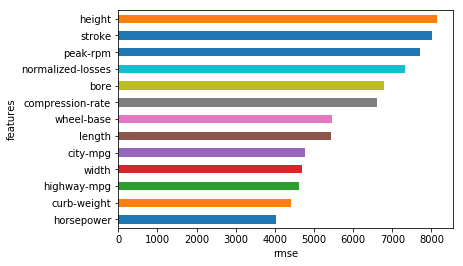

In [11]:
# Plot the series.
ax = rmse_series.plot.barh()
ax.set(xlabel='rmse', ylabel='features')

# Univariate model with multiple k values.

In [12]:
# This function will return rmse vale for each feature and each value of k.
def knn_train_test(train_col, target_col, df):
    
    # dictionary to store rmse for each k value.
    rmse_k_value = {}
    
    # Different values of k.
    k_values = [1,3,5,7,9]
    
    # Iterate for each value of k.
    for k in k_values:
   
        # Create object.
        knn = KNeighborsRegressor(n_neighbors=k)

        # random seed.
        np.random.seed(1)

        # permute indexes.
        shuffled_index = np.random.permutation(df.index)

        # Create new dataframe.
        rand_df = df.reindex(shuffled_index)

        # Create training and testing data.
        half_num_rows = int(len(rand_df)/2)
        train_df = rand_df.iloc[:half_num_rows]
        test_df = rand_df.iloc[half_num_rows:]

        # Fit the model.
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions.
        predictions = knn.predict(test_df[[train_col]])

        # Calculate rmse.
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse ** 0.5
        
        # Store k as key and rmse as the value.
        rmse_k_value[k] = rmse
    
    # Return the dictionary.
    return rmse_k_value

# Create a dictionary to store rmse values.
rmse_values = {}

# Pass each feature except for price.
features = list(numeric_cars.columns)
features.remove('price')
for feature in features:
    rmse_k_values = knn_train_test(feature, 'price', numeric_cars)
    rmse_values[feature] = rmse_k_values

# convert a dictionary to pandas dataframe.
rmse_df = pd.DataFrame(rmse_values)
rmse_df

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,7846.750605,4493.734069,4628.455501,4559.257298,8904.046456,5264.290231,8602.588485,9116.495955,8087.205347,4170.054848,9511.480068,5901.143574,6025.594967
3,7500.569812,5120.161506,5129.835821,4606.413692,8277.609643,5022.318012,6984.239489,7338.684670,7375.063686,4020.849263,8537.550900,4646.746409,4617.305020
5,7330.197653,5461.553998,5427.200961,4704.482590,8144.441043,4401.118255,6780.627785,8006.529545,6610.812153,4037.037713,7697.459696,4766.422505,4630.026799
7,7756.421586,5448.107051,5313.427721,4571.485046,7679.598124,4330.608104,6878.097966,7803.937797,6732.801283,4353.811860,7510.294160,5232.523034,4796.061440
9,7688.096097,5738.405685,5383.054515,4652.914172,7811.036063,4632.044474,6866.808502,7735.554366,7024.485525,4515.135617,7340.041341,5465.209493,5278.358057


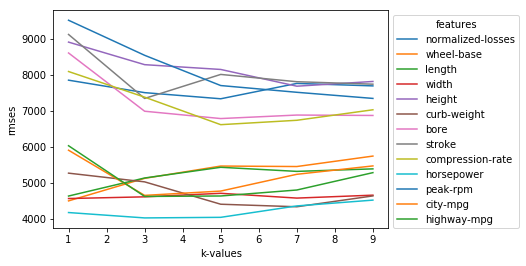

In [13]:
# plot the dataframe.
ax = rmse_df.plot()
ax.set(xlabel='k-values', ylabel='rmses')
ax.legend(bbox_to_anchor=(1,1), loc='best', title='features')

# Multivariate model with a single k value.

In [14]:
# compute average for a songle feature across all k.
rmse_df.mean().sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [15]:
# This function will return rmse vale for multiple features.
def knn_train_test(train_cols, target_col, df):
    
    # Create object.
    knn = KNeighborsRegressor()
    
    # random seed.
    np.random.seed(1)
    
    # permute indexes.
    shuffled_index = np.random.permutation(df.index)
    
    # Create new dataframe.
    rand_df = df.reindex(shuffled_index)
    
    # Create training and testing data.
    half_num_rows = int(len(rand_df)/2)
    train_df = rand_df.iloc[:half_num_rows]
    test_df = rand_df.iloc[half_num_rows:]
    
    # Fit the model.
    knn.fit(train_df[train_cols], train_df[target_col])
    
    # Make predictions.
    predictions = knn.predict(test_df[train_cols]) 
    
    # Calculate rmse.
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse ** 0.5
    
    # Return rmse.
    return rmse

# Create a dictionary to store rmse values.
rmse_values = {}

# Two best features.
rmse_values['two_best_features'] = knn_train_test(['horsepower', 'width'], 'price', numeric_cars)

# Three best features.
rmse_values['three_best_features'] = knn_train_test(['horsepower', 'width', 'curb-weight'],
                                                    'price', numeric_cars)

# Four best features.
rmse_values['four_best_features'] = knn_train_test(['horsepower', 'width', 'curb-weight', 'highway-mpg'], 
                                                   'price', numeric_cars)

# Five best features.
rmse_values['five_best_features'] = knn_train_test(['horsepower', 'width', 'curb-weight', 'highway-mpg', 
                                                    'length'], 'price', numeric_cars)

# Convert the dictionary to series.
rmse_series = pd.Series(rmse_values)
rmse_series

two_best_features      3589.313262
three_best_features    3305.940140
four_best_features     3358.691580
five_best_features     3665.546673
dtype: float64

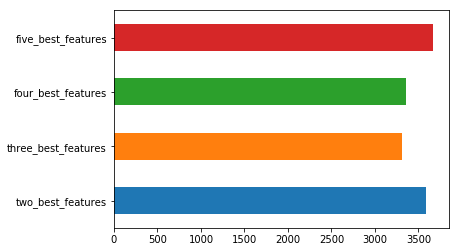

In [16]:
# plot the series.
rmse_series.plot.barh()

# Multivariate model with multiple k values.

In [28]:
# This function will return rmse vale for multiple features and each value of k.
def knn_train_test(train_cols, target_col, df):
    
    # dictionary to store rmse for each k value.
    rmse_k_value = {}
    
    # Different values of k from 1 to 25
    k_values = list(range(1,26))
    
    # Iterate for each value of k.
    for k in k_values:
   
        # Create object.
        knn = KNeighborsRegressor(n_neighbors=k)

        # random seed.
        np.random.seed(1)

        # permute indexes.
        shuffled_index = np.random.permutation(df.index)

        # Create new dataframe.
        rand_df = df.reindex(shuffled_index)

        # Create training and testing data.
        half_num_rows = int(len(rand_df)/2)
        train_df = rand_df.iloc[:half_num_rows]
        test_df = rand_df.iloc[half_num_rows:]

        # Fit the model.
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions.
        predictions = knn.predict(test_df[train_cols])

        # Calculate rmse.
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse ** 0.5
        
        # Store k as key and rmse as the value.
        rmse_k_value[k] = rmse
    
    # Return the dictionary.
    return rmse_k_value

# Create a dictionary to store rmse values.
rmse_values = {}

# Three best features.
rmse_values['three_best_features'] = knn_train_test(['horsepower', 'width', 'curb-weight'],
                                                    'price', numeric_cars)

# Four best features.
rmse_values['four_best_features'] = knn_train_test(['horsepower', 'width', 'curb-weight', 'highway-mpg'], 
                                                   'price', numeric_cars)

# Two best features.
rmse_values['two_best_features'] = knn_train_test(['horsepower', 'width'], 'price', numeric_cars)

# convert the dictionary to dataframe
rmse_df = pd.DataFrame(rmse_values)
rmse_df


,three_best_features,four_best_features,two_best_features
1,3013.010999,2600.746384,4061.961305
2,2813.285970,2725.432507,3497.499362
3,3171.585284,3108.858031,3402.869264
4,3182.313742,3217.313521,3587.004420
5,3305.940140,3358.691580,3589.313262
6,3522.506849,3633.168703,3680.062981
7,3774.377209,3896.127441,3756.927964
8,3978.969124,4002.838390,3937.770418
9,3992.923681,4055.530937,4078.348592
10,4076.238147,4128.678077,4163.828374


[Text(0,0.5,'rmses'), Text(0.5,0,'k-values')]

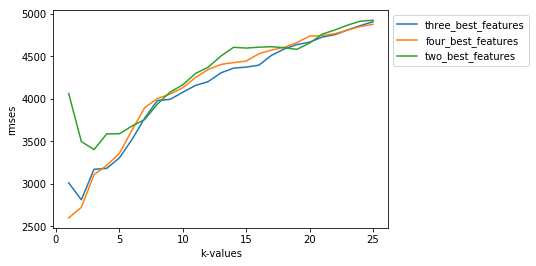

In [18]:
# plot the dataframe.
ax = rmse_df.plot()
ax.legend(bbox_to_anchor=(1,1), loc='best')
ax.set(xlabel='k-values', ylabel='rmses')

# Univariate model with k-fold cross validation.

In [25]:
# Import libraries.
from sklearn.model_selection import cross_val_score, KFold

# This function will return rmse vale for each feature.
def knn_train_test(train_col, target_col, df):
    
    # Create object.
    knn = KNeighborsRegressor()
    
    # Split the data into k consecutive folds.
    kf = KFold(n_splits=2, shuffle=True, random_state=1)
    
    # Generate mse scores using cross validation.
    mse = cross_val_score(knn, df[[train_col]], df[target_col], scoring='neg_mean_squared_error', cv=kf)
    
    # Calculate rmse
    rmse = np.absolute(mse) ** 0.5
    
    # Calculate average rmse
    avg_rmse = np.mean(rmse)
    
    # Return average rmse.
    return avg_rmse

# Create a dictionary to store rmse values.
rmse_values = {}

# Pass each feature except for price.
features = list(numeric_cars.columns)
features.remove('price')
for feature in features:
    rmse = knn_train_test(feature, 'price', numeric_cars)
    rmse_values[feature] = rmse

# Convert the dictionary to a pandas series.
rmse_series = pd.Series(rmse_values)

# sort in ascending order.
rmse_series = rmse_series.sort_values()
rmse_series

horsepower           3983.289877
curb-weight          4130.915690
highway-mpg          4336.427993
width                4480.755962
city-mpg             4788.022045
length               5645.803155
wheel-base           5709.567683
bore                 6561.161516
compression-rate     6875.609561
normalized-losses    7482.632289
peak-rpm             7721.986452
height               7735.811797
stroke               7768.258096
dtype: float64